In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from pathlib import Path

In [2]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp')
files = Path(data_dir).glob("./**/*.tif")
smr_names = [str(f) for f in files]
dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['tif_file'] = smr_names

for data in df.itertuples():
    s = data.tif_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 1][-8:]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20230910]
df

,tif_file,date,slip,cell,trial_string
62,R:\home\firefly_link\468_patch_clamp\20230911\...,20230911,1,1,468_patch_clamp_20230911_slip1_cell1_image_after
63,R:\home\firefly_link\468_patch_clamp\20230911\...,20230911,1,1,468_patch_clamp_20230911_slip1_cell1_image_before
64,R:\home\firefly_link\468_patch_clamp\20230911\...,20230911,2,1,468_patch_clamp_20230911_slip2_cell1_image_after
65,R:\home\firefly_link\468_patch_clamp\20230911\...,20230911,2,1,468_patch_clamp_20230911_slip2_cell1_image_before
66,R:\home\firefly_link\468_patch_clamp\20231004\...,20231004,2,1,468_patch_clamp_20231004_slip2_cell1_image_after
...,...,...,...,...,...
149,R:\home\firefly_link\468_patch_clamp\20231129\...,20231129,6,1,468_patch_clamp_20231129_slip6_cell1_20231129_...
150,R:\home\firefly_link\468_patch_clamp\20231129\...,20231129,6,1,468_patch_clamp_20231129_slip6_cell1_20231129_...
151,R:\home\firefly_link\468_patch_clamp\20231129\...,20231129,7,1,468_patch_clamp_20231129_slip7_cell1_20231129_...
152,R:\home\firefly_link\468_patch_clamp\20231129\...,20231129,7,1,468_patch_clamp_20231129_slip7_cell1_20231129_...


In [3]:
df['tif_file'][63]

'R:\\home\\firefly_link\\468_patch_clamp\\20230911\\slip1\\cell1\\image_before\\image_before_MMStack_Default.ome.tif'

(-0.5, 511.5, 511.5, -0.5)

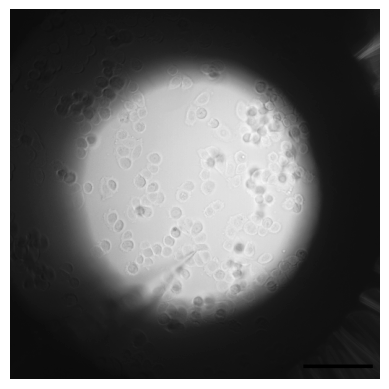

In [4]:
import tifffile
import scipy.ndimage as ndimage
img = tifffile.imread(df['tif_file'][63])

im_scalebar_length_um = 100

length = int(im_scalebar_length_um / 1.04)

img[-20:-15, -length - 10 : -10] = np.ones((5,96), dtype=np.uint8) * 255
plt.imshow(img,cmap="Greys_r")
#plt.imshow(over, cmap = 'Greys_r')
plt.axis('off')

In [5]:
img.shape

(512, 512)

In [7]:
df['tif_file'][96]

'R:\\home\\firefly_link\\468_patch_clamp\\20231031\\slip4\\cell1\\20231031_slip4_cell1_img_before\\20231031_slip4_cell1_img_before_MMStack_Default.ome.tif'

(-0.5, 2047.5, 2047.5, -0.5)

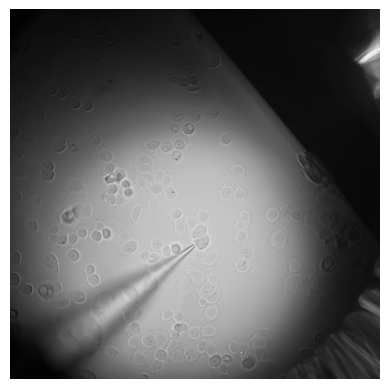

In [9]:
import tifffile

img = tifffile.imread(df['tif_file'][96])
#img[-20:-15, -length - 10 : -10] = np.ones(4, dtype=np.uint8) * 255
plt.imshow(img,cmap="Greys_r")
plt.axis('off')